## <font style='font-size: 30px;'> QUESTÃO 1 </font> <hr style='line: 2px solid;'>

- Represente a função de transferência na forma canônica controlável e na observável. 
- Calcule os autovalores da forma canônica controlável e da observável. 
- Teste a controlabilidade e observabilidade nas duas representações.
- Simule as duas representações a uma entrada em degrau unitário e confronte os estados de uma representação com a outra.

> Formas cacônicas controláveis e observáveis

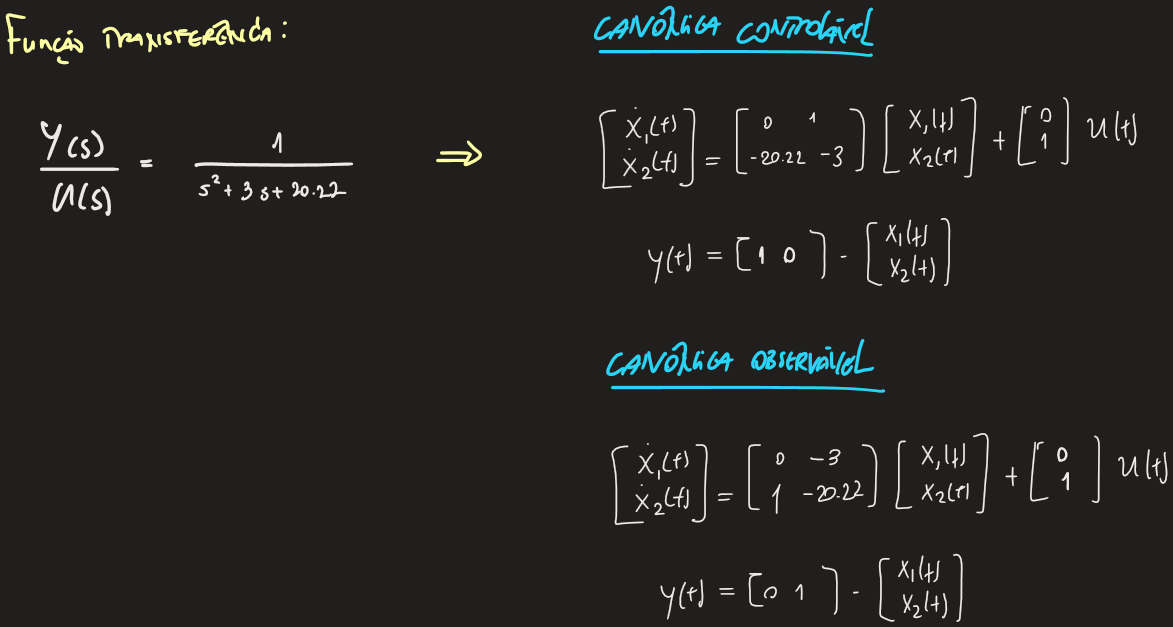

In [72]:
# Forma canônica controlável
A_controlavel = np.array([[0, 1], [-20.22, -3]])
B_controlavel = np.array([[0], [1]])
C_controlavel = np.array([[1, 0]])
D_controlavel = np.array([0])

# Forma canônica observável
A_observavel = np.array([[0, -3], [1, -20.22]])
B_observavel = np.array([[1], [0]])
C_observavel = np.array([0, 1])
D_observavel = np.array([0])

> Autovalores → indica se o sistema é BIBO estável

In [9]:
encontrar_autovalores(A_controlavel)

Autovalores:
[-1.5+4.23910368j -1.5-4.23910368j]


In [10]:
encontrar_autovalores(A_observavel)

Autovalores:
[ -0.14947291 -20.07052709]


> Controlabilidade e Observabilidade

In [16]:
calcular_posto(A_controlavel, B_controlavel)

Posto é 'n'


2

In [17]:
calcular_posto(A_observavel, B_observavel)

Posto é 'n'


2

> Teste ao degrau (observável e controlável)

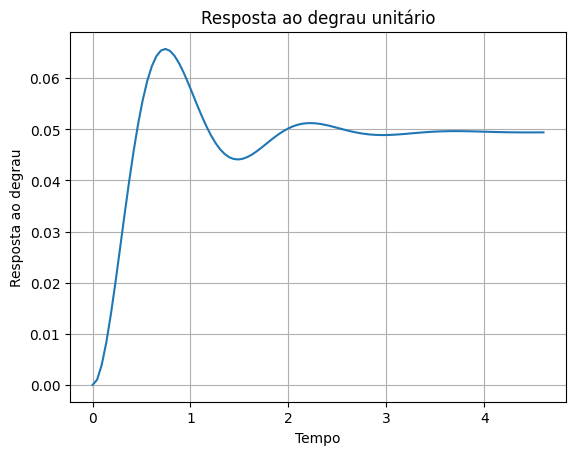

Informações do degrau:
Tempo de subida: 0.2791
Tempo de acomodação: 2.5119
Máximo overshoot: 32.8983
Erro em regime estacionário: 0.9505


In [18]:
obter_degrau_ss2(A_controlavel, B_controlavel, C_controlavel, D_controlavel)

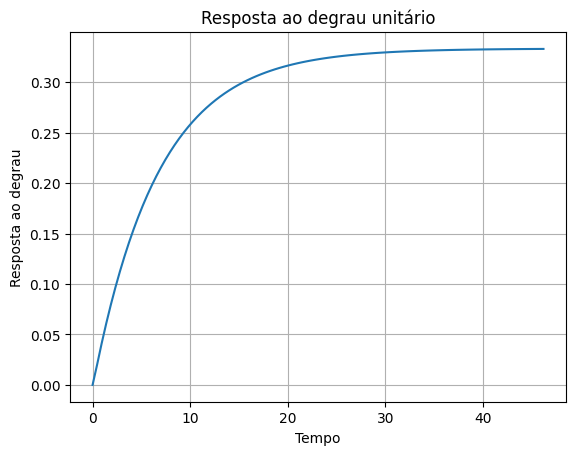

Informações do degrau:
Tempo de subida: 14.9379
Tempo de acomodação: 26.6081
Máximo overshoot: 0.0000
Erro em regime estacionário: 0.6667


In [19]:
obter_degrau_ss2(A_observavel, B_observavel, C_observavel, D_observavel)

## <font style='font-size: 30px;'> QUESTÃO 2 </font> <hr style='line: 2px solid;'>

- Projete uma realimentação de estados. 
- Use a técnica de alocação de pólos adotando pólos dominantes complexos conjugados. 
- Verifique se o sistema realimentado possui os pólos desejados.

> Projeto de realimentação

Em resumo: Para projetar uma realimentação, é necessário encontrar uma matriz K que, quando multiplicada pela matriz de estado A, produza uma matriz (A - BK) com os polos desejados. Essa matriz K é encontrada através da técnica de alocação de polos, onde os polos desejados são especificados e a matriz K é calculada para atingir esses polos.

Fazer isso envolve 5 passos
    
1. Definir os pólos desejados
    
    *Usaremos (-4+3j) e (-4-3j), pois já sabemos de atividades anteriores que esses polos produzem nossos comportamentos desejados.*

2. Verificar a controlabilidade
    
    *Já verificamos acima!*

3. Projetar a matriz de realimentação

In [68]:
p_desired = (-4 + 3j)
K = projetar_realimentacao(A_controlavel, B_controlavel, p_desired, conjugate=True)
print(K[0])

[4.78 5.  ]


4. Verificar os pólos do sistema realimentado

In [69]:
polos = verificar_polos_realimentados(A, B, K)

Polos do sistema realimentado:
[-4.+3.j -4.-3.j]


5. Simular o sistema realimentado.

In [70]:
_ = obter_sistema_realimentado(A, B, K)

[[  0.   1.]
 [-25.  -8.]]


In [78]:
A_realimentado = verificar_polos_realimentados(A_controlavel, B_controlavel, K)

Polos do sistema realimentado:
[-4.+3.j -4.-3.j]


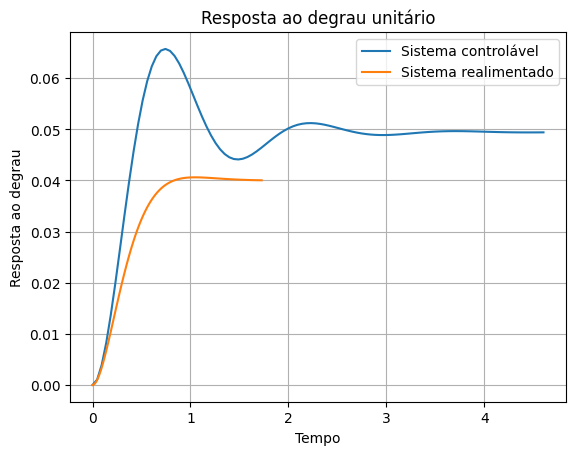

In [77]:
sys1 = ct.ss(A_controlavel, B_controlavel, C_controlavel, D_controlavel)
sys2 = ct.ss(A_realimentado, B_controlavel, C_controlavel, D_controlavel)
t1, y1 = ct.step_response(sys1)
t2, y2 = ct.step_response(sys2)

plt.plot(t1, y1, label='Sistema controlável')
plt.plot(t2, y2, label='Sistema realimentado')
plt.xlabel('Tempo')
plt.ylabel('Resposta ao degrau')
plt.title('Resposta ao degrau unitário')
plt.grid(True)
plt.legend()
plt.show()

## <font style='font-size: 30px;'> QUESTÃO 3 </font> <hr style='line: 2px solid;'>

- Projete um servossistema tipo 1. 
- Use a técnica de alocação de pólos adotando pólos dominantes complexos conjugados. 
- Verifique se o sistema realimentado possui os pólos desejados. 
- Simule e verifique se a saída segue uma referência do tipo degrau unitário com o comportamento determinado pelos polos dominantes.
- Verifique se o sistema também compensa um distúrbio do tipo degrau unitário na entrada da planta.

> Projeto de servossistema tipo 1


A função abaixo implementa a matriz estendida de integração demonstrada acima. Além disso, os polos foram alocados seguindo o seguinte critério:

- Afastamos os polos complexos em 3 vezes em relação a origem;
- Posicionamos o polo integrador 10 vezes mais distante, para garantir que não irá interferir com os dominantes

Com isso, diminuimos o tempo de acomodação em 2 segundos e garantimos o erro 0

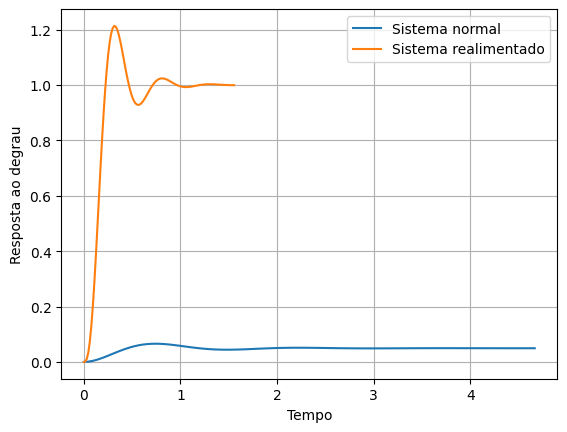

In [96]:
# Calcular os polos do sistema em malha aberta
polosControlavel = np.linalg.eigvals(A_controlavel)

# Criar o modelo de espaço de estados
sistemaControlavel = signal.StateSpace(A_controlavel, B_controlavel, C_controlavel, D_controlavel)

# Simular a resposta ao degrau do sistema em malha aberta
t, y = signal.step(sistemaControlavel)
plt.plot(t, y, label='Sistema normal')





# Definir o sistema aumentado para a alocação de polos
# Construção da matriz de estado aumentada At:
At = np.block([[A_controlavel, np.zeros((A_controlavel.shape[0], 1))], [-C_controlavel, 0]])
# print(At)

# Construção da matriz de entrada aumentada Bt:
Bt = np.vstack((B_controlavel, 0))

# Construção da matriz de realimentação aumentada Br:
# Matriz de zeros do tamanho da matriz A_controlavel com uma coluna de uns abaixo
Br = np.block([[np.zeros((A_controlavel.shape[0], 1))], [1]])

# Definir os polos desejados para o sistema em malha fechada
polosDesejados = np.block([3 * polosControlavel, 10 * np.min(polosControlavel[0].real)])

# Calcular o ganho de controle K utilizando a função place
K = signal.place_poles(At, Bt, polosDesejados).gain_matrix

# Calcular a matriz de estado do sistema em malha fechada
Acl = At - np.dot(Bt, K)

# Definir a matriz C em malha fechada
Ccl = np.block([C_controlavel, 0])
Dcl = np.array([0])

# Criar o modelo de espaço de estados do sistema em malha fechada
sistemaRealimentado = signal.StateSpace(Acl, Br, Ccl, Dcl)

# Simular a resposta ao degrau do sistema em malha fechada
t, y = signal.step(sistemaRealimentado)
plt.plot(t, y, label='Sistema realimentado')





# Plotar a resposta ao degrau do sistema em malha fechada
plt.xlabel('Tempo')
plt.ylabel('Resposta ao degrau')
plt.legend()
plt.grid(True)
plt.show()

## <font style='font-size: 30px;'> QUESTÃO 4 </font> <hr style='line: 2px solid;'>

- Projete um observador de estados para a planta. 
- Use a técnica de alocação de pólos adotando pólos dominantes complexos conjugados, mais rápidos que os adotados para a realimentação. 
- Verifique se o observador possui os pólos desejados. 
- Simule o observador e confronte os estados estimados pelo observador com os da planta, nas condições nulas e não nulas quando submetidos a uma entrada do tipo degrau unitário.

> Projeto de observador

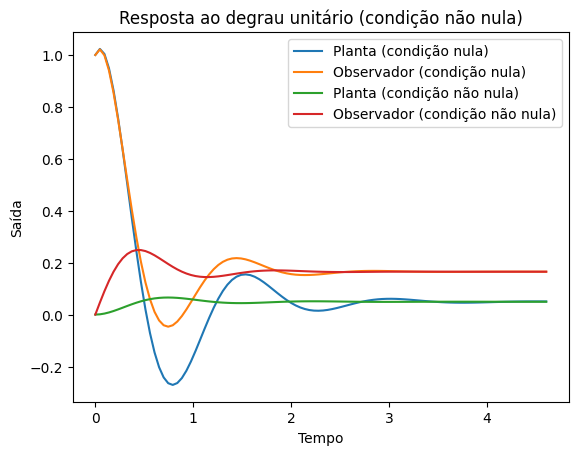

In [104]:
# Polos desejados para o observador
p = np.array([-4 + 3j])

# Calculando a matriz de ganho do observador usando o método de Ackermann
L = ct.acker(A_controlavel.T, C_controlavel.T, p).T
# Calcula a matriz de ganho do observador usando a matriz de observabilidade (A_controlavel.T, C_controlavel.T) e os polos desejados

# Verificando os polos do observador
polosObservador = np.linalg.eigvals(A_controlavel - L @ C_controlavel)
# Calcula os polos do observador verificando os autovalores da matriz (A_controlavel - L @ C_controlavel)





# Simulação
sistemaControlavel = ct.ss(A_controlavel, B_controlavel, C_controlavel, D_controlavel)
# Cria um modelo de espaço de estados para a planta
sistemaObservavel = ct.ss(A_controlavel - L @ C_controlavel, L, C_controlavel, D_controlavel)
# Cria um modelo de espaço de estados para o observador

# Condição nula: degrau unitário na entrada
t, y_plant = ct.step_response(sistemaControlavel, T=t, X0=[1, 1])
# Simula a resposta ao degrau da planta e retorna os vetores de tempo (t) e resposta (y_plant)
t, y_observer = ct.step_response(sistemaObservavel, T=t, X0=[1, 1])
# Simula a resposta ao degrau do observador usando o mesmo tempo (t) e retorna a resposta (y_observer)

# Condição não nula: degrau unitário na entrada
t, y_plant_nonzero = ct.step_response(sistemaControlavel, T=t, X0=[0, 0])
# Simula a resposta ao degrau da planta com uma condição inicial não nula e retorna a resposta (y_plant_nonzero)
t, y_observer_nonzero = ct.step_response(sistemaObservavel, T=t, X0=[0, 0])
# Simula a resposta ao degrau do observador com uma condição inicial não nula e retorna a resposta (y_observer_nonzero)





# Plot dos resultados
plt.figure()
plt.plot(t, y_plant, label='Planta (condição nula)')
plt.plot(t, y_observer, label='Observador (condição nula)')
plt.plot(t, y_plant_nonzero, label='Planta (condição não nula)')
plt.plot(t, y_observer_nonzero, label='Observador (condição não nula)')
plt.xlabel('Tempo')
plt.ylabel('Saída')
plt.title('Resposta ao degrau unitário (condição não nula)')
plt.legend()

plt.show()

## <font style='font-size: 30px;'> QUESTÃO 5 </font> <hr style='line: 2px solid;'>

- Adicione o observador projetado no item 4 ao servossistema projetado no item 3. 
- Simule e verifique se a saída segue uma referência do tipo degrau unitário com o comportamento determinado pelos polos dominantes.

> Unificando tudo

Polos do observador: [-2.+4.49666543j -2.-4.49666543j]


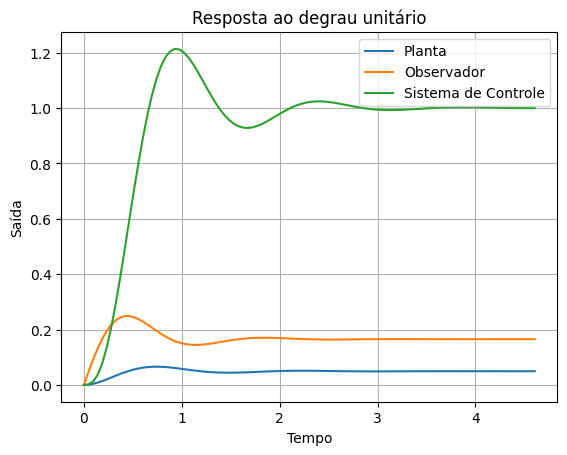

In [125]:
# Código do item 3 (Servossistema projetado)
# Definir o sistema aumentado para a alocação de polos
At = np.block([[A, np.zeros((A.shape[0], 1))], [-C, 0]])
Bt = np.vstack((B, 0))
Br = np.block([[np.zeros((A.shape[0], 1))], [1]])

# Calcular os polos do sistema em malha aberta
polosMalhaAberta = np.linalg.eigvals(A)

# Definir os polos desejados para o sistema em malha fechada
polosFechadaDesejados = np.block([3 * polosMalhaAberta, 10 * np.min(polosMalhaAberta[0].real)])

# Calcular o ganho de controle K utilizando a função place
K = signal.place_poles(At, Bt, polosFechadaDesejados).gain_matrix

# Calcular a matriz de estado do sistema em malha fechada
Acl = At - np.dot(Bt, K)

# Definir a matriz C em malha fechada
Ccl = np.block([C, 0])
Dcl = np.array([0])

# Criar o modelo de espaço de estados do sistema em malha fechada
sistemaMalhaFechada = signal.StateSpace(Acl, Br, Ccl, Dcl)

# Simular a resposta ao degrau do sistema em malha fechada
t, y_servo = signal.step(sistemaMalhaFechada)


# Código do item 4 (Observador projetado)
# Modelo da planta
A_planta = np.array([[0, 1], [-20.22, -3]])
B_planta = np.array([[0], [1]])
C_planta = np.array([[1, 0]])
D_planta = np.array([[0]])

# Polos desejados para o observador
p = np.array([-4 + 3j])

# Calculando a matriz de ganho do observador
L = control.acker(A_planta.T, C_planta.T, p).T

# Verificando os polos do observador
observer_poles = np.linalg.eigvals(A_planta - L @ C_planta)
print("Polos do observador:", observer_poles)

# Simulação do observador
sys_planta = control.ss(A_planta, B_planta, C_planta, D_planta)
sys_observer = control.ss(A_planta - L @ C_planta, L, C_planta, D_planta)

# Simulação do observador na referência degrau unitário
t, y_planta = control.step_response(sys_planta)
t, y_observer = control.step_response(sys_observer, T=t)

# Plot dos resultados
plt.figure()
plt.plot(t, y_planta, label='Planta')
plt.plot(t, y_observer, label='Observador')
plt.plot(t, y_servo, label='Sistema de Controle')
plt.xlabel('Tempo')
plt.ylabel('Saída')
plt.title('Resposta ao degrau unitário')
plt.legend()
plt.grid(True)
plt.show()

# Funções feitas sob medida

In [90]:
import numpy as np
import control as ct
from scipy import signal
import matplotlib.pyplot as plt


# Manipuladores

def obter_degrau_ss(A, B, C, D):
    
    # Simulação da resposta ao degrau
    t, y = signal.step((A, B, C, D))
    plt.plot(t, y)

    plt.xlabel('Tempo')
    plt.ylabel('Resposta ao degrau')
    plt.title('Resposta ao degrau unitário')
    plt.grid(True)
    plt.show()

def obter_degrau_ss2(A, B, C, D):
    sys = ct.ss(A, B, C, D)
    t, y = ct.step_response(sys)
    info = ct.step_info(sys)
    
    plt.plot(t, y)
    plt.xlabel('Tempo')
    plt.ylabel('Resposta ao degrau')
    plt.title('Resposta ao degrau unitário')
    plt.grid(True)
    plt.show()
    
    print("Informações do degrau:")
    print(f"Tempo de subida: {info['RiseTime']:.4f}")
    print(f"Tempo de acomodação: {info['SettlingTime']:.4f}")
    print(f"Máximo overshoot: {info['Overshoot']:.4f}")
    error = 1.0 - info['SteadyStateValue']
    print(f"Erro em regime estacionário: {error:.4f}")


# Questão 1


def obter_espaco_estados(num, den):
    sys = ct.tf2ss(num, den)  # Converter para a forma de espaço de estados
    
    print("Matriz A:")
    print(sys.A)
    
    print("\nMatriz B:")
    print(sys.B)
    
    print("\nMatriz C:")
    print(sys.C)
    
    print("\nMatriz D:")
    print(sys.D)
    
    return sys.A, sys.B, sys.C, sys.D

def obter_forma_canonica_controlavel(num, den):
    # Calcula o grau do polinômio do denominador
    grau = len(den) - 1

    # Cria a matriz A_cont
    A_cont = []
    for i in range(1, grau + 1):
        linha = [0] * (grau - 1) + [-den[i] / den[0]] + [0] * (i - 1)
        A_cont.append(linha)

    # Cria a matriz B_cont
    B_cont = [[1] + [0] * (grau - 1)]

    # Cria a matriz C_cont
    C_cont = [[0] * (grau - 1) + [num[0] / den[0]]]

    # Define a matriz D_cont
    D_cont = [[0]]

    # Imprime as matrizes
    print("Matriz A_cont:")
    for linha in A_cont:
        print(linha)
    print("Matriz B_cont:")
    for linha in B_cont:
        print(linha)
    print("Matriz C_cont:")
    for linha in C_cont:
        print(linha)
    print("Matriz D_cont:")
    for linha in D_cont:
        print(linha)

    return A_cont, B_cont, C_cont, D_cont

def encontrar_autovalores(A):
    autovalores = np.linalg.eigvals(A)
    print("Autovalores:")
    print(autovalores)

def calcular_posto(A, B):
    n = A.shape[0]  # Obtém o número de linhas de A
    M = B
    for i in range(n):
        A_power = np.linalg.matrix_power(A, i+1)
        M = np.hstack((M, A_power.dot(B)))
    posto = np.linalg.matrix_rank(M)
    if posto == n:print(f"Posto é 'n'")
    return posto

def verificar_controlabilidade(A, B):
    n = A.shape[0]  # Dimensão do sistema
    controlabilidade_matrix = np.column_stack([B] + [np.dot(np.linalg.matrix_power(A, i), B) for i in range(1, n)])
    posto = np.linalg.matrix_rank(controlabilidade_matrix)

    return posto == n

def verificar_observabilidade(A, C):
    n = A.shape[0]  # Dimensão do sistema
    observabilidade_matrix = np.column_stack([C] + [np.dot(C, np.linalg.matrix_power(A, i)) for i in range(1, n)])
    posto = np.linalg.matrix_rank(observabilidade_matrix)

    return posto == n


# Questão 2

def projetar_realimentacao(A, B, p_desired, conjugate=False):
    
    # Verificar a controlabilidade
    controlavel = verificar_controlabilidade(A, B)
    if not controlavel:
        print("O sistema não é controlável.")
        return None

    # Calcular a matriz de realimentação
    p_array = np.array(p_desired, dtype=np.complex128)
    if conjugate:
        p_conjugate = np.conjugate(p_desired)
        p_array = np.array([p_desired, p_conjugate], dtype=np.complex128)
    K = signal.place_poles(A, B, p_array).gain_matrix

    # Retorne o vetor K
    return K

def verificar_polos_realimentados(A, B, K):
    
    # Verificar a controlabilidade
    controlavel = verificar_controlabilidade(A, B)
    if not controlavel:
        print("O sistema não é controlável.")
        return None

    # Calcular os polos do sistema realimentado
    R = A - np.dot(B, K)
    poles = np.linalg.eigvals(R)
    print("Polos do sistema realimentado:")
    print(poles)

    return R


# Questão 3

def estender_planta(A, B, C, D):
    
    n = A.shape[0]  # Obtém o número de variáveis de estado da planta original
    m = B.shape[1]  # Obtém o número de entradas da planta original
    
    # Cria uma matriz extendida A com o integrador adicionado
    A_ext = np.block([[A, np.zeros((n, 1))],
                      [np.zeros((1, n)), np.zeros((1, 1))]])
    
    # Cria uma matriz extendida B com uma coluna adicional para o integrador
    B_ext = np.block([[B],
                      [np.zeros((1, m))]])
    
    # Cria uma matriz extendida C adicionando uma linha para a saída do integrador
    C_ext = np.block([[C, np.zeros((1, 1))]])
    
    # Cria uma matriz extendida D adicionando uma linha para a saída do integrador
    D_ext = np.block([[D]])
    
    return A_ext, B_ext, C_ext, D_ext

def projetar_integrador(A, B, C, D):
    
    # Definir o sistema aumentado para a alocação de polos
    At = np.block([[A, np.zeros((A.shape[0], 1))], [-C, 0]])
    Bt = np.vstack((B, 0))
    Br = np.block([[np.zeros((A.shape[0], 1))], [1]])

    # Calcular os polos do sistema em malha aberta
    polosMalhaAberta = np.linalg.eigvals(A)

    # Definir os polos desejados para o sistema em malha fechada
    polosFechadaDesejados = np.block([3 * polosMalhaAberta, 10 * np.min(polosMalhaAberta[0].real)])

    # Calcular o ganho de controle K utilizando a função place
    K = signal.place_poles(At, Bt, polosFechadaDesejados).gain_matrix

    # Calcular a matriz de estado do sistema em malha fechada
    Acl = At - np.dot(Bt, K)

    # Definir a matriz C em malha fechada
    Ccl = np.block([C, 0])
    Dcl = np.array([0])

    # Criar o modelo de espaço de estados do sistema em malha fechada
    sistemaMalhaFechada = signal.StateSpace(Acl, Br, Ccl, Dcl)

    # Simular a resposta ao degrau do sistema em malha fechada
    t, y = signal.step(sistemaMalhaFechada)

    # Plotar a resposta ao degrau do sistema em malha fechada
    plt.plot(t, y)
    plt.xlabel('Tempo')
    plt.ylabel('Resposta ao degrau')
    plt.title('Resposta ao degrau do sistema em malha fechada')
    plt.grid(True)
    plt.show()

    # Retornar os polos alocados
    return np.linalg.eigvals(Acl)

def projetar_LQR(A, B, Q, R):
  """
  Projeta um controlador LQR para o sistema descrito pelas matrizes A, B, Q e R.

  Args:
    A: A matriz de estado do sistema.
    B: A matriz de entrada do sistema.
    Q: A matriz de penalidade do erro.
    R: A matriz de penalidade de controle.

  Returns:
    K: A matriz de ganho do controlador LQR.
  """

  # Calcula a matriz de observância.
  P = np.linalg.inv(A.T @ Q @ A + R)

  # Calcula a matriz de ganho do controlador.
  K = P @ A.T @ Q @ B

  return K

def simular_LQR(A, B, K, u0, t_end):
  """
  Simula o sistema descrito pelas matrizes A, B e K a partir da condição inicial u0 até o tempo t_end.

  Args:
    A: A matriz de estado do sistema.
    B: A matriz de entrada do sistema.
    K: A matriz de ganho do controlador LQR.
    u0: A condição inicial do estado.
    t_end: O tempo final da simulação.

  Returns:
    u: A trajetória do estado do sistema.
    y: A trajetória da saída do sistema.
  """

  # Inicializa o estado do sistema.
  x = u0

  # Inicializa a trajetória do estado do sistema.
  u = []
  y = []

  # Simula o sistema.
  for t in np.arange(0, t_end, step=1):
    x = A @ x + B @ u
    u.append(x)
    y.append(C @ x)

  return u, y


# Questão 4 

def projetar_observador_estados(A, C, p_desired):
    # Implemente aqui o seu código para projetar o observador de estados
    # Retorna a matriz de ganho do observador L
    pass

def simular_observador_estados(A, C, L, x0_planta, x0_observador, t_final):
    
    sys_planta = signal.StateSpace(A, np.zeros((A.shape[0], 1)), C, np.zeros((1, 1)))
    sys_observador = signal.StateSpace(A - np.dot(L, C), np.dot(L, np.ones((1, A.shape[0]))), np.eye(A.shape[0]), np.zeros((A.shape[0], 1)))

    t, y_planta, x_planta = signal.step(sys_planta, X0=x0_planta, T=np.linspace(0, t_final, 500))
    t, y_observador, x_observador = signal.step(sys_observador, X0=x0_observador, T=np.linspace(0, t_final, 500))

    plt.figure()
    plt.plot(t, np.squeeze(y_planta), label='Saída Planta')
    plt.plot(t, np.squeeze(y_observador), label='Saída Observador')
    plt.xlabel('Tempo')
    plt.ylabel('Saída')
    plt.title('Saída da Planta vs Observador de Estados')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure()
    for i in range(A.shape[0]):
        plt.plot(t, x_planta[:, i], label=f'Estado {i+1} Planta')
        plt.plot(t, x_observador[:, i], label=f'Estado {i+1} Observador')
    plt.xlabel('Tempo')
    plt.ylabel('Estado')
    plt.title('Estados da Planta vs Observador de Estados')
    plt.legend()
    plt.grid(True)
    plt.show()





In [ ]:
import numpy as np
from scipy.signal import place_poles

# Definir as matrizes de sistema
A = np.array([[-0.5, 0.1, 0], [0.5, -5, 1], [0, 2, -3]])
B = np.array([[0.5], [0], [0]])
C = np.array([[1, 0, 0]])
D = np.array([[0]])

# Definir os polos desejados
poles_desired = np.array([-1, -2, -3])

# Calcular o ganho de controle
K = place_poles(A, B, poles_desired)

#Converter o ganho de controle em um array
K_array = np.array(K)

# Simular o sistema em malha fechada
t = np.arange(0, 10, 0.01)
u = np.zeros(t.shape)
y = signal.step(A-np.dot(B,K_array), u)

# Plotar a resposta ao degrau
plt.plot(t, y)
plt.xlabel('Tempo')
plt.ylabel('Saída')
plt.title('Resposta ao degrau do sistema em malha fechada')
plt.grid(True)
plt.show()


Polos do sistema em malha aberta: [-1.5+4.23910368j -1.5-4.23910368j]


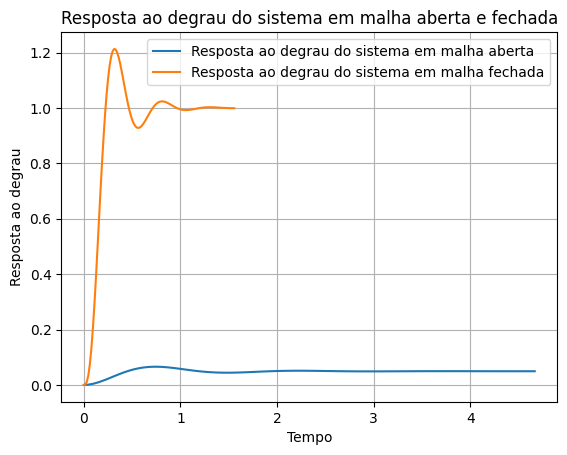

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Definir as matrizes do sistema
A = np.array([[0, 1], [-20.22, -3]])
B = np.array([[0], [1]])
C = np.array([1, 0])
D = np.array([0])

# Calcular os polos do sistema em malha aberta
polosMalhaAberta = np.linalg.eigvals(A)
print("Polos do sistema em malha aberta:", polosMalhaAberta)

# Criar o modelo de espaço de estados
sistemaMalhaAberta = signal.StateSpace(A, B, C, D)

# Simular a resposta ao degrau do sistema em malha aberta
t, y = signal.step(sistemaMalhaAberta)
plt.plot(t, y, label='Resposta ao degrau do sistema em malha aberta')

# Definir o sistema aumentado para a alocação de polos
At = np.block([[A, np.zeros((A.shape[0], 1))], [-C, 0]])
Bt = np.vstack((B, 0))
Br = np.block([[np.zeros((A.shape[0], 1))], [1]])

# Calcular os polos do sistema em malha aberta
polosMalhaAberta = np.linalg.eigvals(A)

# Definir os polos desejados para o sistema em malha fechada
polosFechadaDesejados = np.block([3 * polosMalhaAberta, 10 * np.min(polosMalhaAberta[0].real)])

# Calcular o ganho de controle K utilizando a função place
K = signal.place_poles(At, Bt, polosFechadaDesejados).gain_matrix

# Calcular a matriz de estado do sistema em malha fechada
Acl = At - np.dot(Bt, K)

# Definir a matriz C em malha fechada
Ccl = np.block([C, 0])
Dcl = np.array([0])

# Criar o modelo de espaço de estados do sistema em malha fechada
sistemaMalhaFechada = signal.StateSpace(Acl, Br, Ccl, Dcl)

# Simular a resposta ao degrau do sistema em malha fechada
t, y = signal.step(sistemaMalhaFechada)
plt.plot(t, y, label='Resposta ao degrau do sistema em malha fechada')

# Plotar a resposta ao degrau do sistema em malha fechada
plt.xlabel('Tempo')
plt.ylabel('Resposta ao degrau')
plt.title('Resposta ao degrau do sistema em malha aberta e fechada')
plt.legend()
plt.grid(True)
plt.show()